# K Nearest Neighbors Project 

Welcome to the KNN Project! 

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
import warnings
warnings.filterwarnings('ignore')

## Get the Data

**Reading the 'KNN_Project_Data csv file into a dataframe**

In [3]:
df=pd.read_csv('KNN_Project_Data')

**Checking the head of the dataframe.**

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [16]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [17]:
df.nunique()

XVPM            1000
GWYH            1000
TRAT            1000
TLLZ            1000
IGGA            1000
HYKR            1000
EDFS            1000
GUUB            1000
MGJM            1000
JHZC            1000
TARGET CLASS       2
dtype: int64

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

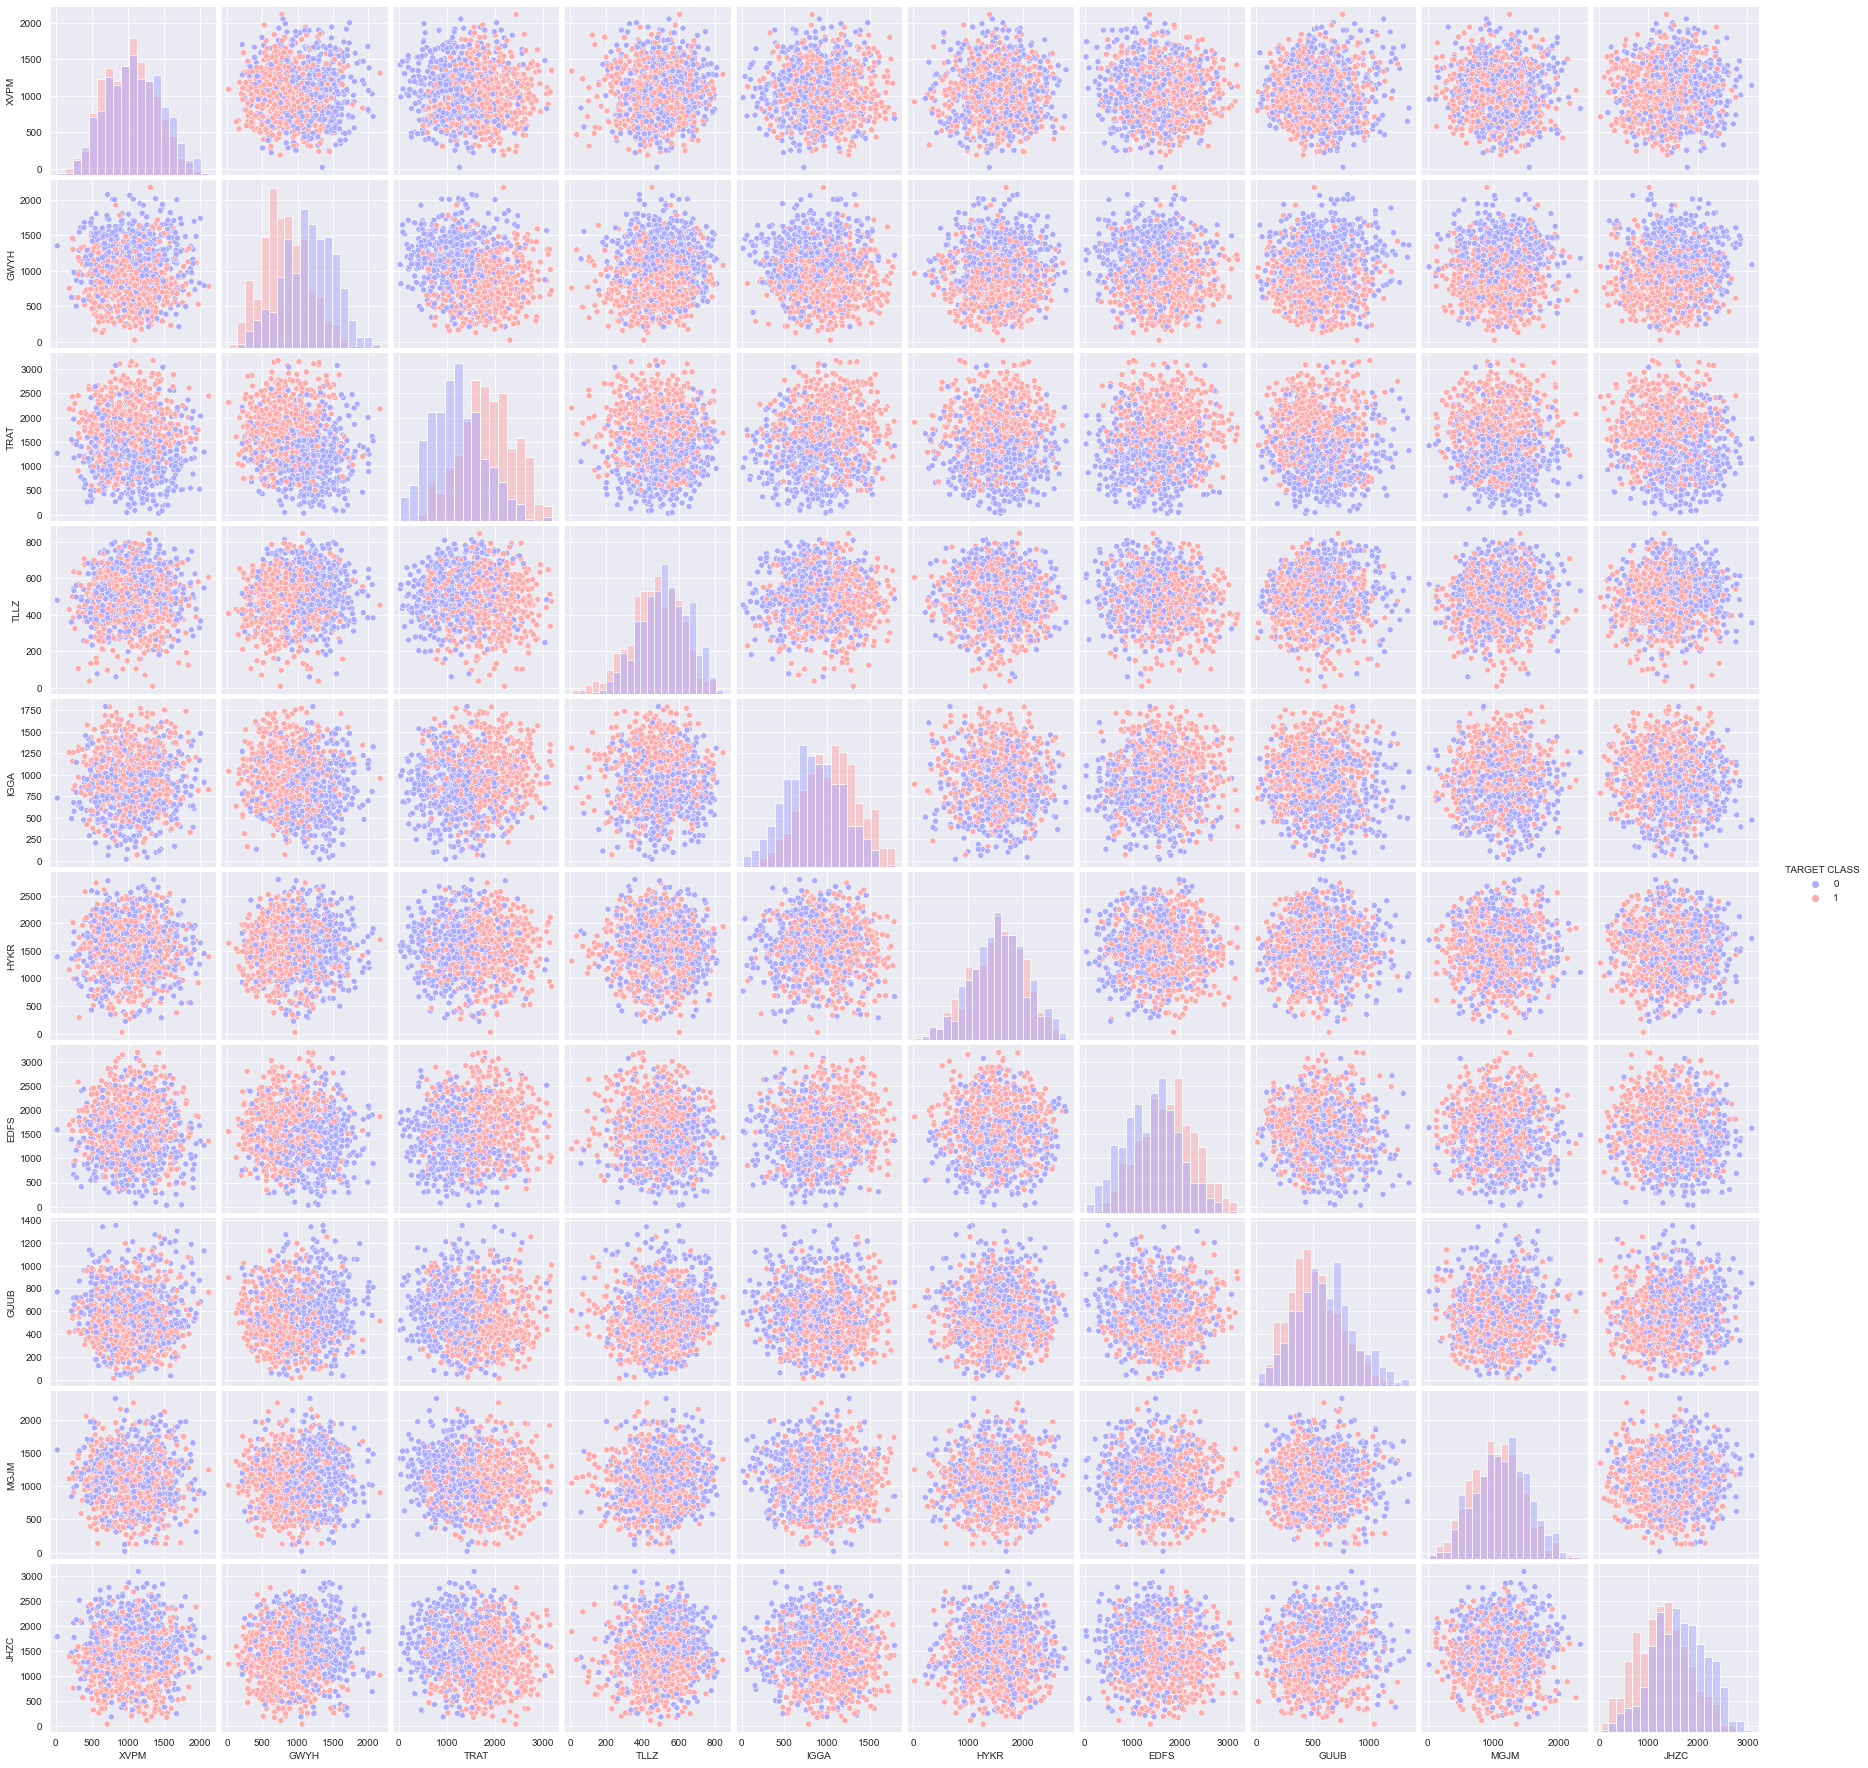

In [5]:
sns.pairplot(df,hue='TARGET CLASS',diag_kind='hist',palette='bwr')

## Distplot to see the distribution of continuous variables

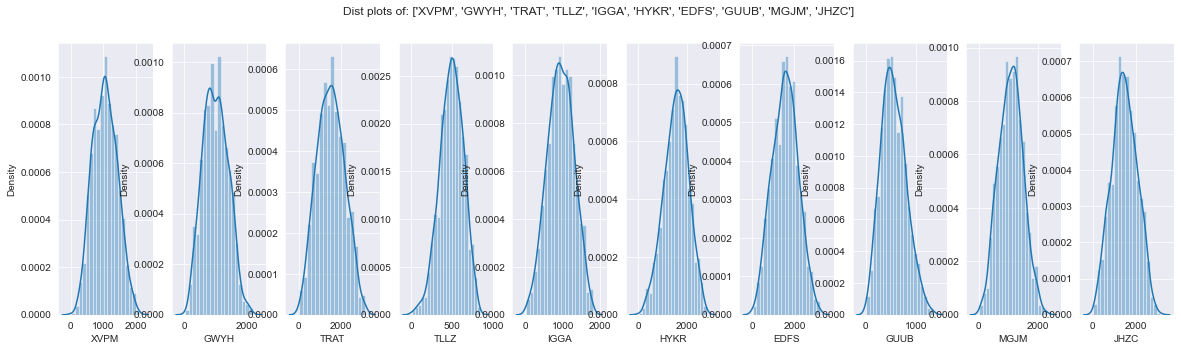

In [20]:
colsToPlot=['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=df[i],ax=subPlot[feature])

All the continuous variables are normally distributed.

## Missing values treatment

<AxesSubplot:>

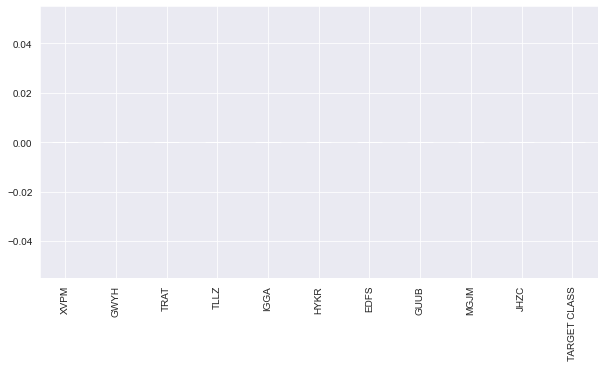

In [21]:
plt.figure(figsize=(10,5))
df.isnull().sum().plot(kind='bar')

There are no missing values in the dataset.

## Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

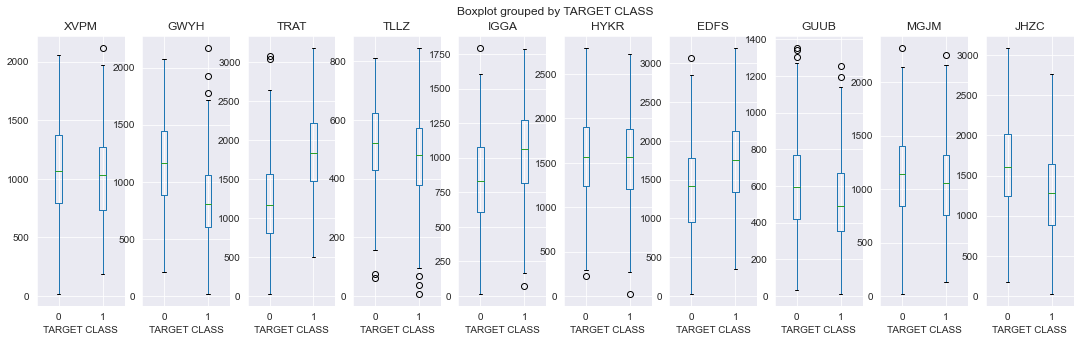

In [23]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='TARGET CLASS', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

The other chart exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of Target Class. It hints that these variables might be correlated with Target Class except HYKR where the boxws are somewhat aligned in the same line.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [24]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']
FunctionAnova(inpData=df, TargetVariable='TARGET CLASS', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

XVPM is correlated with TARGET CLASS | P-Value: 0.011490594500103856
GWYH is correlated with TARGET CLASS | P-Value: 3.672180531112707e-43
TRAT is correlated with TARGET CLASS | P-Value: 2.4602673038299548e-61
TLLZ is correlated with TARGET CLASS | P-Value: 4.3974964655452686e-08
IGGA is correlated with TARGET CLASS | P-Value: 1.3858186076539134e-21
HYKR is NOT correlated with TARGET CLASS | P-Value: 0.6296783356440553
EDFS is correlated with TARGET CLASS | P-Value: 1.1015948427167575e-19
GUUB is correlated with TARGET CLASS | P-Value: 2.79529326522466e-08
MGJM is correlated with TARGET CLASS | P-Value: 0.0017430923515759334
JHZC is correlated with TARGET CLASS | P-Value: 1.709101266276134e-22


['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'EDFS', 'GUUB', 'MGJM', 'JHZC']

The results of ANOVA confirm our visual analysis using box plots above.

<b>Final selected Continuous columns:</b>

'XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'EDFS', 'GUUB', 'MGJM', 'JHZC'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [26]:
SelectedColumns=['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'EDFS', 'GUUB', 'MGJM', 'JHZC']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,905.469453,658.118202,539.459350,1899.850792


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [27]:
# Printing all the column names for our reference
DataForML.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'EDFS', 'GUUB', 'MGJM', 'JHZC'], dtype='object')

# Standardize the Variables
K-nearest neighbors is a distance based classifier that classifies new observations based on similarity measures (e.g., distance metrics) with labeled observations of the training set. Standardization makes all variables to contribute equally to the similarity measures .

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler= StandardScaler()

In [32]:
scaler.fit(DataForML)

StandardScaler()

**Using the .transform() method to transform the features to a scaled version.**

In [33]:
scaled_features= scaler.transform(DataForML)
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [36]:
df_feat= pd.DataFrame(scaled_features,columns=DataForML.columns)
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Using train_test_split to split the data into a training set and a testing set.**

In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable='TARGET CLASS'
Predictors =['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'EDFS', 'GUUB', 'MGJM', 'JHZC']

X=DataForML[Predictors].values
y=df[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [39]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.3)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [41]:
knn= KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [44]:
predict=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predict))

[[105  49]
 [ 41 105]]


In [45]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       154
           1       0.68      0.72      0.70       146

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**We will create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [46]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [47]:
from sklearn.model_selection import cross_val_score
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

**Now create the following plot using the information from the for loop.**

Text(0, 0.5, 'Error Rate')

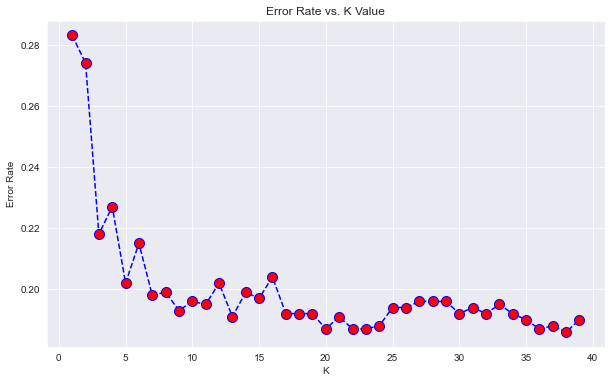

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')

plt.xlabel('K')
plt.ylabel('Error Rate')

Here, we see that at K >= 20 the error rate tend to hover around 0 to 0.20. Hence we select K=20.

## Retrain with new K Value

**We will retrain our model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [52]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=20)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=20)
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.78      0.85      0.82       146

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

[[120  34]
 [ 22 124]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.84       0.82984686 0.85949418 0.83993597 0.8        0.78896593
 0.82957393 0.76979281 0.74       0.829983  ]

Final Average Accuracy of the model: 0.81


**So at K=1 we got 70% accuracy and now with K=20 we get 81% accuracy.**